<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.111882,84.552100,-3.444422,170.219561,174.466987,-4.247426
1,0.0,1.0,59.131781,62.765144,5.657421,137.554346,132.692085,4.862261
2,0.0,2.0,74.395166,24.010789,1.478792,109.884747,106.466673,3.418074
3,0.0,3.0,32.037705,57.032913,1.458740,100.529358,101.033076,-0.503718
4,0.0,4.0,86.171919,75.815382,1.359100,173.346400,171.980059,1.366341
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,61.985450,89.284098,3.075078,164.344626,161.280103,3.064523
29996,999.0,26.0,63.703694,44.937893,-6.180539,112.461049,119.173567,-6.712518
29997,999.0,27.0,95.242901,62.667681,-5.182965,162.727618,168.212627,-5.485009
29998,999.0,28.0,86.877983,34.055394,-0.384842,130.548535,131.578157,-1.029622


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.111882  84.552100 -3.444422  170.219561  174.466987 -4.247426
      1.0    59.131781  62.765144  5.657421  137.554346  132.692085  4.862261
      2.0    74.395166  24.010789  1.478792  109.884747  106.466673  3.418074
      3.0    32.037705  57.032913  1.458740  100.529358  101.033076 -0.503718
      4.0    86.171919  75.815382  1.359100  173.346400  171.980059  1.366341
...                ...        ...       ...         ...         ...       ...
999.0 25.0   61.985450  89.284098  3.075078  164.344626  161.280103  3.064523
      26.0   63.703694  44.937893 -6.180539  112.461049  119.173567 -6.712518
      27.0   95.242901  62.667681 -5.182965  162.727618  168.212627 -5.485009
      28.0   86.877983  34.055394 -0.384842  130.548535  131.578157 -1.029622
      29.0   62.285855  76.573954 -4.761716  144.098093  149.019938 -4.921845

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.111882  84.552100 -3.444422  170.219561  174.466987 -4.247426
      1.0    59.131781  62.765144  5.657421  137.554346  132.692085  4.862261
      2.0    74.395166  24.010789  1.478792  109.884747  106.466673  3.418074
      3.0    32.037705  57.032913  1.458740  100.529358  101.033076 -0.503718
      4.0    86.171919  75.815382  1.359100  173.346400  171.980059  1.366341
...                ...        ...       ...         ...         ...       ...
999.0 25.0   61.985450  89.284098  3.075078  164.344626  161.280103  3.064523
      26.0   63.703694  44.937893 -6.180539  112.461049  119.173567 -6.712518
      27.0   95.242901  62.667681 -5.182965  162.727618  168.212627 -5.485009
      28.0   86.877983  34.055394 -0.384842  130.548535  131.578157 -1.029622
      29.0   62.285855  76.573954 -4.761716  144.098093  149.019938 -4.921845

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.111882,84.552100,-3.444422,170.219561,174.466987,-4.247426
1,0.0,1.0,59.131781,62.765144,5.657421,137.554346,132.692085,4.862261
2,0.0,2.0,74.395166,24.010789,1.478792,109.884747,106.466673,3.418074
3,0.0,3.0,32.037705,57.032913,1.458740,100.529358,101.033076,-0.503718
4,0.0,4.0,86.171919,75.815382,1.359100,173.346400,171.980059,1.366341
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,61.985450,89.284098,3.075078,164.344626,161.280103,3.064523
29996,999.0,26.0,63.703694,44.937893,-6.180539,112.461049,119.173567,-6.712518
29997,999.0,27.0,95.242901,62.667681,-5.182965,162.727618,168.212627,-5.485009
29998,999.0,28.0,86.877983,34.055394,-0.384842,130.548535,131.578157,-1.029622


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.111882  84.552100 -3.444422  170.219561  174.466987 -4.247426
      1.0    59.131781  62.765144  5.657421  137.554346  132.692085  4.862261
      2.0    74.395166  24.010789  1.478792  109.884747  106.466673  3.418074
      3.0    32.037705  57.032913  1.458740  100.529358  101.033076 -0.503718
      4.0    86.171919  75.815382  1.359100  173.346400  171.980059  1.366341
...                ...        ...       ...         ...         ...       ...
999.0 25.0   61.985450  89.284098  3.075078  164.344626  161.280103  3.064523
      26.0   63.703694  44.937893 -6.180539  112.461049  119.173567 -6.712518
      27.0   95.242901  62.667681 -5.182965  162.727618  168.212627 -5.485009
      28.0   86.877983  34.055394 -0.384842  130.548535  131.578157 -1.029622
      29.0   62.285855  76.573954 -4.761716  144.098093  149.019938 -4.921845

[30000 rows x 6 columns]

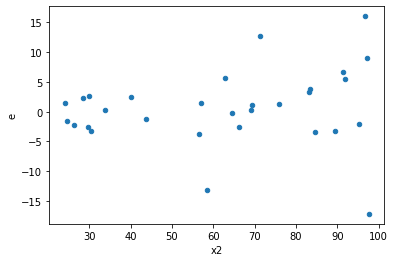

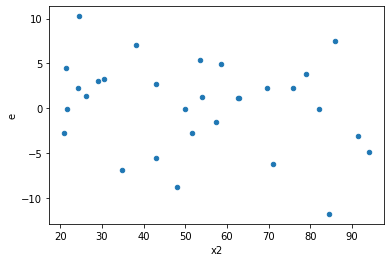

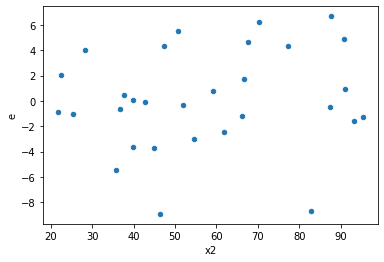

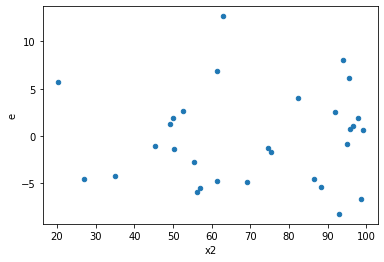

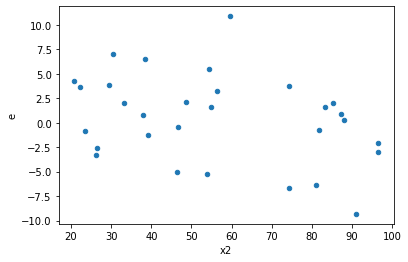

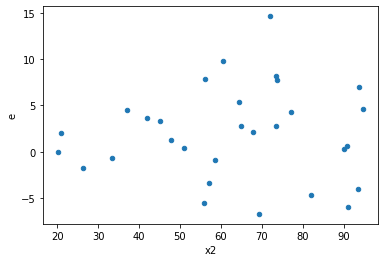

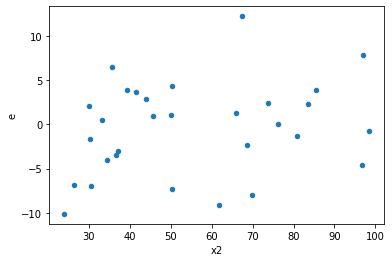

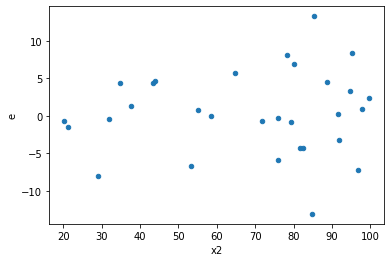

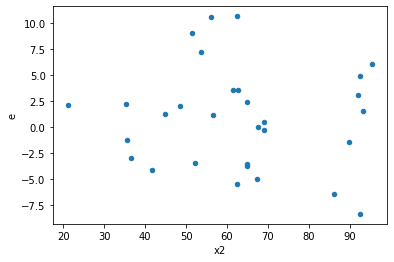

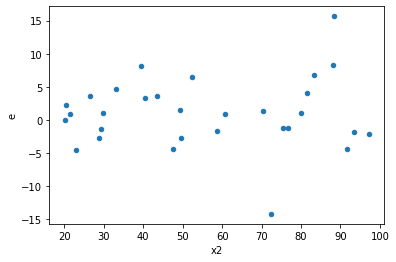

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,6.0,290.07617059677045,165.8481020176989,14.503808529838523,27.64135033628315,1.9057994511866942,0.4342399725149304,0.7828800137425348,0.2171199862574652,Reject005=1 : Homoscedasticity
2.0,16.0,10.0,242.42789909664643,170.52569232843052,15.151743693540402,17.05256923284305,1.1254525932954518,0.8744670311800622,0.5627664844099689,0.4372335155900311,Reject005=1 : Homoscedasticity
9.0,16.0,10.0,206.035061010591,534.6541304168389,12.877191313161937,53.465413041683895,4.151946782605942,0.027321041237156285,0.9863394793814219,0.013660520618578142,Reject005=0 : Heteroscedasticity
10.0,14.0,12.0,89.97014841424414,210.94845958452225,6.42643917244601,17.579038298710188,2.735424365966466,0.08829050898751656,0.9558547455062417,0.04414525449375828,Reject005=1 : Homoscedasticity
15.0,17.0,9.0,350.389194958503,446.20615267092165,20.61112911520606,49.578461407880184,2.4054219024470225,0.1818144469453984,0.9090927765273008,0.0909072234726992,Reject005=1 : Homoscedasticity
16.0,15.0,11.0,273.1048459791532,314.2660673679234,18.206989731943548,28.56964248799304,1.569157939264862,0.45560015306519697,0.7721999234674015,0.22780007653259848,Reject005=1 : Homoscedasticity
17.0,13.0,13.0,236.55833872733837,253.03854536416176,18.196795286718334,19.464503489550903,1.0696665639667804,0.9052039129957667,0.5473980435021166,0.4526019564978834,Reject005=1 : Homoscedasticity
19.0,12.0,14.0,182.4882262663579,506.94695528001694,15.20735218886316,36.21049680571549,2.3811177880284524,0.12411341501047257,0.9379432924947637,0.062056707505236286,Reject005=1 : Homoscedasticity
20.0,16.0,10.0,197.57191377486515,391.6410208920689,12.348244610929072,39.16410208920689,3.1716331610846034,0.0692641987767677,0.9653679006116161,0.03463209938838385,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,16.0,767.6189324928214,238.88044457592656,76.76189324928214,14.93002778599541,0.1944979097572614,0.0122880186313309,Reject005=0 : Heteroscedasticity
1.0,20.0,6.0,290.07617059677045,165.8481020176989,14.503808529838523,27.64135033628315,1.9057994511866942,0.4342399725149304,Reject005=1 : Homoscedasticity
2.0,16.0,10.0,242.42789909664643,170.52569232843052,15.151743693540402,17.05256923284305,1.1254525932954518,0.8744670311800622,Reject005=1 : Homoscedasticity
3.0,7.0,19.0,176.14717934766438,341.0963734550389,25.163882763952053,17.95244070815994,0.7134209325548639,0.6765399756570529,Reject005=1 : Homoscedasticity
4.0,16.0,10.0,381.95056692789416,112.6685220556245,23.871910432993385,11.26685220556245,0.4719711158932017,0.17428754770805202,Reject005=1 : Homoscedasticity
5.0,16.0,10.0,520.4514539858078,119.87467602656665,32.52821587411299,11.987467602656665,0.3685252105141334,0.07298275883805162,Reject005=1 : Homoscedasticity
6.0,10.0,16.0,273.31549558051876,297.7840171944904,27.331549558051876,18.61150107465565,0.6809530149443247,0.5449882799598438,Reject005=1 : Homoscedasticity
7.0,19.0,7.0,638.0979304893733,155.47947558786717,33.58410160470386,22.211353655409596,0.6613651279657463,0.44508633943837383,Reject005=1 : Homoscedasticity
8.0,11.0,15.0,282.56952311530017,278.18735719304965,25.68813846502729,18.545823812869976,0.7219605982005622,0.5931710624182873,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      863
Reject005=0 : Heteroscedasticity    137
Name: Result_test, dtype: int64